In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dataset_path = "football.csv"
df = pd.read_csv(dataset_path)

In [66]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB
None


In [67]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 x            y  interveningOpponents  interveningTeammates  \
count  8925.000000  8925.000000           8925.000000           8925.000000   
mean     14.564631     0.364408              2.531989              0.336471   
std       7.841865     8.999063              1.386693              0.680175   
min       0.000000   -33.920000              0.000000              0.000000   
25%       8.480000    -5.740000              2.000000              0.000000   
50%      12.470000     0.500000              2.000000              0.000000   
75%      20.950000     6.730000              3.000000              0.000000   
max      70.820000    33.920000             11.000000              7.000000   

            minute       second  
count  8925.000000  8925.000000  
mean     48.541401    29.243810  
std      26.397998    17.306565  
min       0.000000     0.000000  
25%      26.000000    14.000000  
50%      49.000000    29.000000  
75%      71.000000    44.0000

In [68]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                  34
dtype: int64


<Figure size 1200x800 with 0 Axes>

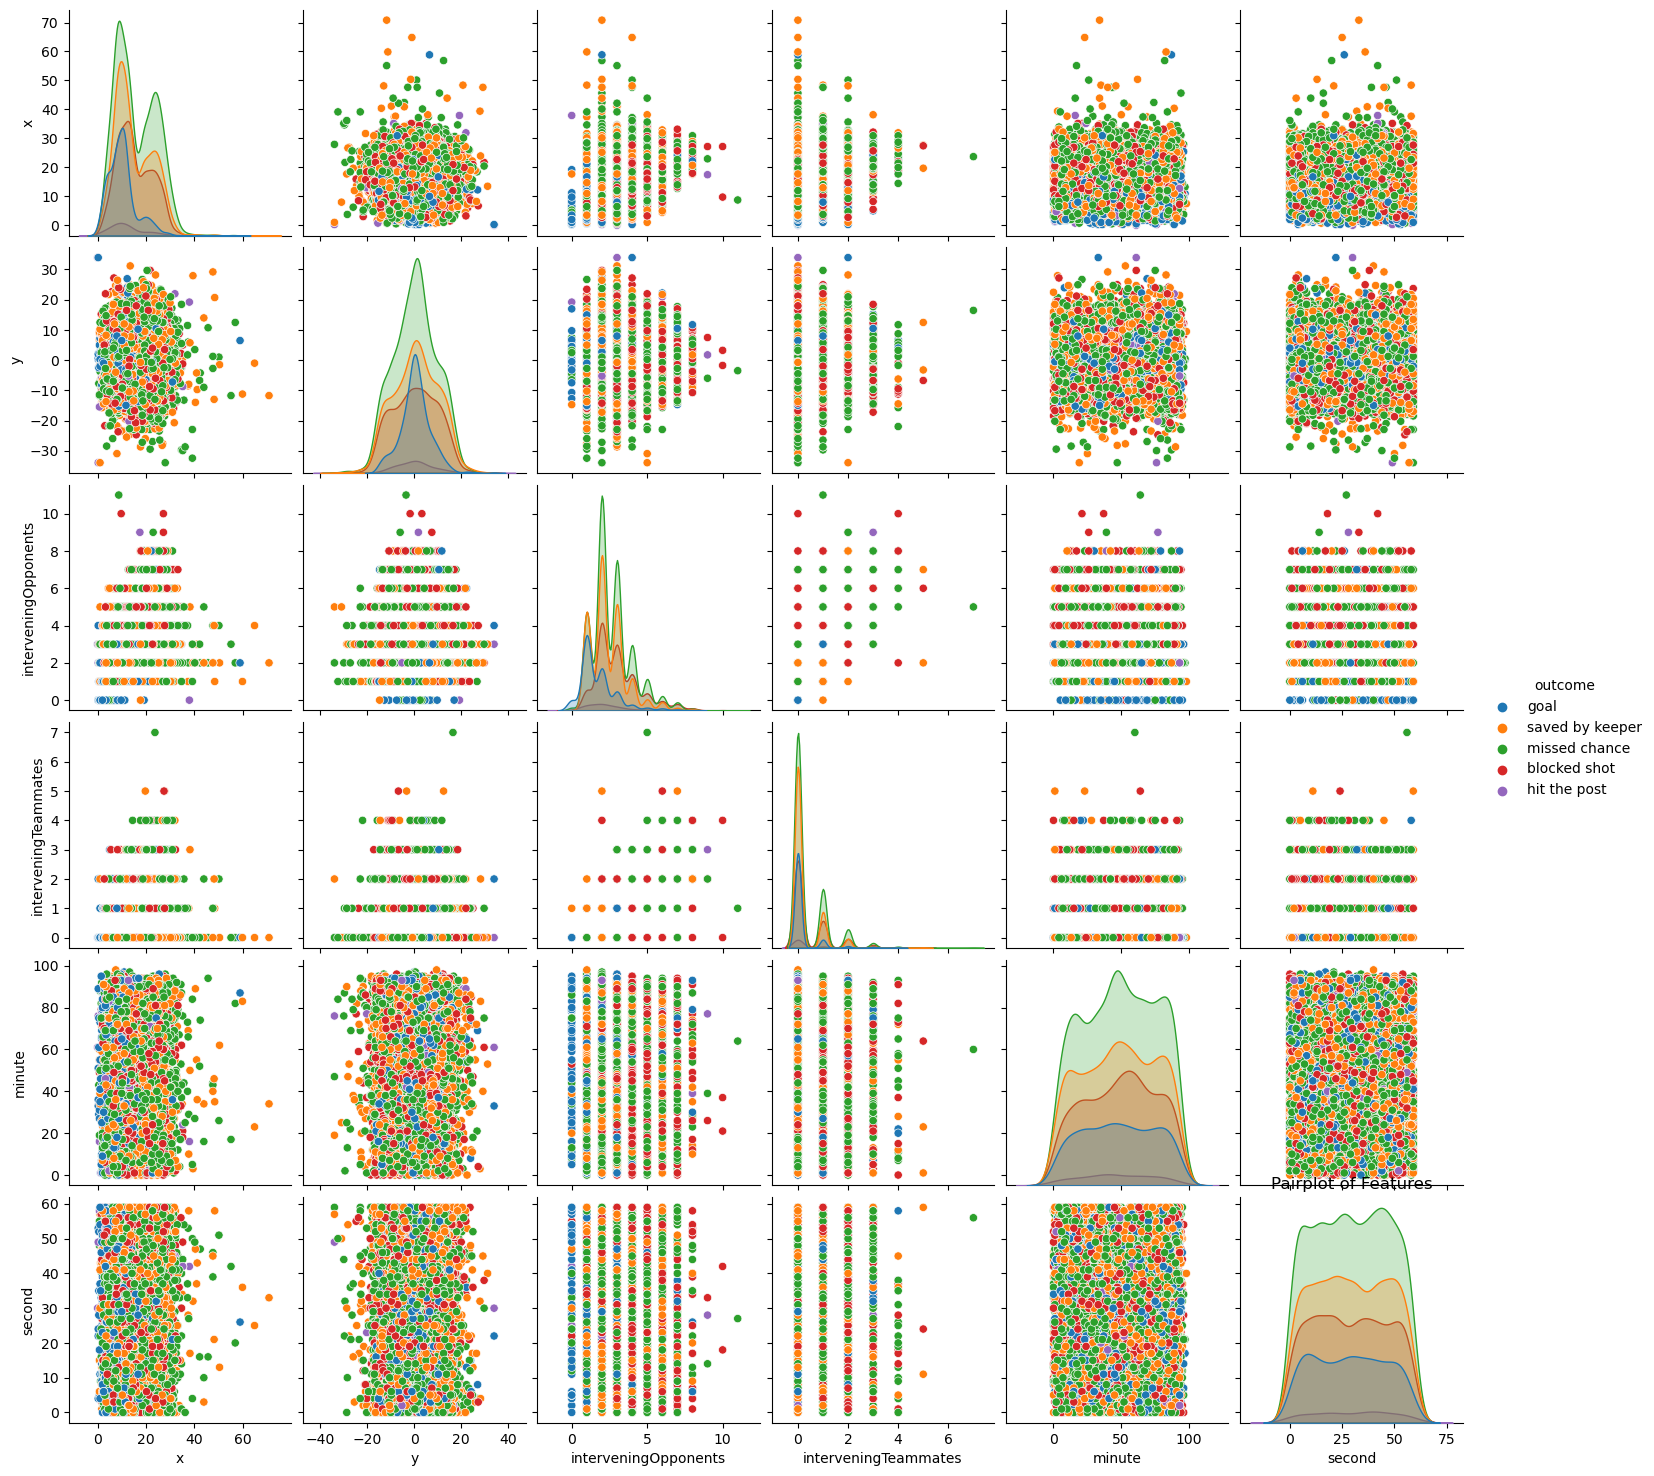

In [9]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue="outcome")
plt.title("Pairplot of Features")
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_17416\715681033.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


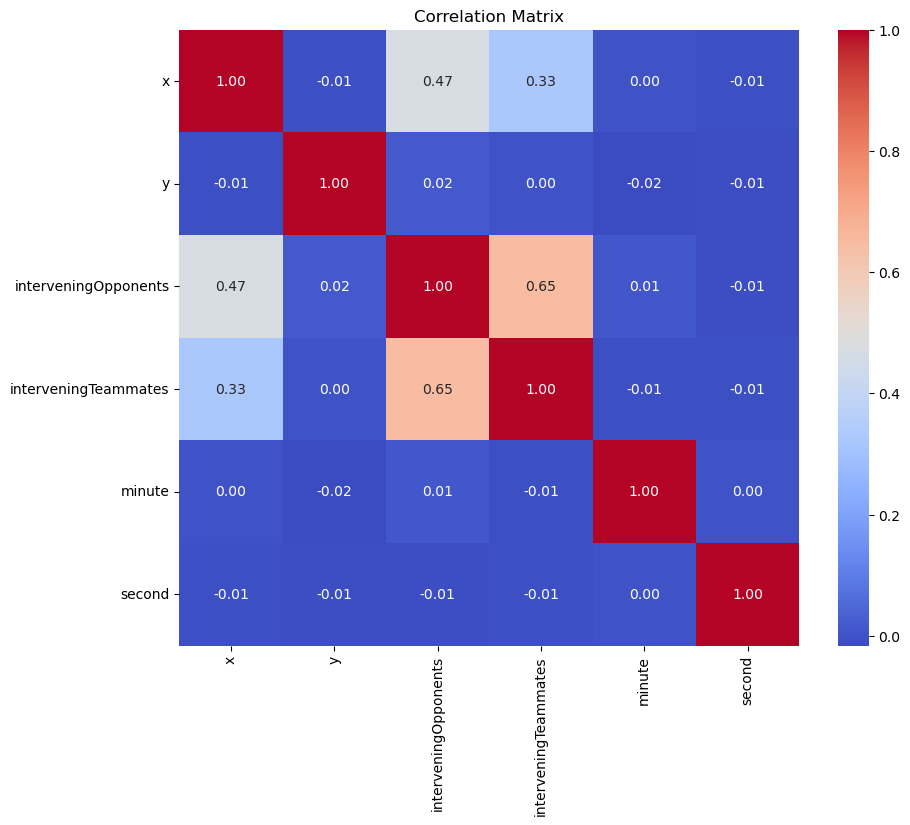

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [82]:
dataset_path = "football.csv"
df = pd.read_csv(dataset_path)
df = df.drop('matchId', axis = 1)
df = df.drop('playerId', axis = 1)
df.head()

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [83]:
df['playType'].unique()

array(['open play', 'free kick', 'penalty', 'olimpico'], dtype=object)

In [84]:
df = df.dropna()
df.head()

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [85]:
from sklearn.feature_selection import mutual_info_regression

# Feature encoding:

category_mapping1 = {'open play': 1, 'free kick': 2, 'penalty': 3, 'olimpico': 4}
category_mapping2 = {'left foot': 1, 'right foot': 2, 'head': 3, 'other': 4}
category_mapping3 = {'low': 1, 'medium': 2, 'high': 3}
category_mapping4 = {'goal': 1, 'saved by keeper': 2, 'missed chance': 3, 'blocked shot': 4, 'hit the post': 5}

df['playType'] = df['playType'].map(category_mapping1)
df['bodyPart'] = df['bodyPart'].map(category_mapping2)
df['interferenceOnShooter'] = df['interferenceOnShooter'].map(category_mapping3)
df['outcome'] = df['outcome'].map(category_mapping4)

df.head()

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,1,2,13.47,-11.22,1,0,2,70,9,1
1,1,1,9.48,14.22,3,0,2,55,4,2
2,2,1,29.43,-1.25,6,2,1,86,31,2
3,1,2,26.93,1.00,4,1,2,77,2,3
4,1,2,10.72,5.24,2,0,2,76,46,1


In [86]:
print(df.isnull().sum())

playType                 0
bodyPart                 0
x                        0
y                        0
interveningOpponents     0
interveningTeammates     0
interferenceOnShooter    0
minute                   0
second                   0
outcome                  0
dtype: int64


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=["outcome"]).values
y = df["outcome"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["outcome"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

# Display the results
print("\nMutual Information Importance:")
print(mi_df_sorted)


Mutual Information Importance:
                 Feature  Importance
2                      x    0.045771
3                      y    0.041763
4   interveningOpponents    0.037391
5   interveningTeammates    0.023048
6  interferenceOnShooter    0.015745
0               playType    0.015620
1               bodyPart    0.009799
8                 second    0.003724
7                 minute    0.000000


# Part 2

In [15]:
df = pd.read_csv("cars.csv")
df.head()

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
0,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,0,1
1,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,0,1
2,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,0,1
3,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,0,1
4,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,71.181451,0,1


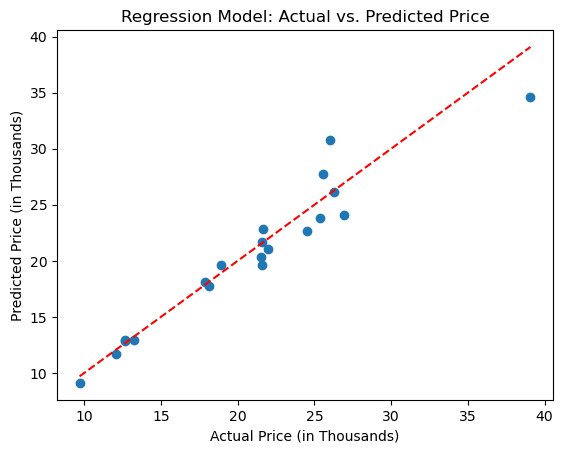

Accuracy for Price_in_Thousands: 94.49%

Mutual Information Importance:
                   Feature  Importance
10       Power Perf Factor    0.792671
1        Year Resale Value    0.690521
3               Horsepower    0.667588
7              Curb Weight    0.594954
8            Fuel Capacity    0.555087
9          Fuel Efficiency    0.463308
5                    Width    0.449400
2              Engine Size    0.423651
6                   Length    0.319007
4                Wheelbase    0.184245
11        Vehicle Type Car    0.036962
12  Vehicle Type Passenger    0.036962
0       Sales in Thousands    0.000000


Text(0.5, 1.0, 'learning curve')

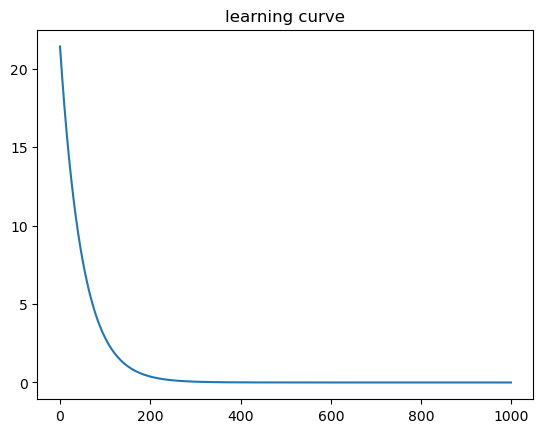

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

# Load your dataset (replace "your_dataset.csv" with the actual file name)
df = pd.read_csv("cars.csv")

# Select relevant features (excluding "Price_in_Thousands") and target variable
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize weights and learning rate
weights = np.zeros(X_train_scaled.shape[1] + 1)
learning_rate = 0.01
num_iterations = 1000

# Add bias term (intercept)
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
err = []
# Gradient Descent
for _ in range(num_iterations):
    # Compute predictions
    predictions = np.dot(X_train_bias, weights)
    
    # Compute errors
    errors = y_train - predictions
    err.append(np.mean(errors))
    
    # Update weights
    gradient = -2 * np.dot(X_train_bias.T, errors) / len(y_train)
    weights -= learning_rate * gradient

# Predict on test set
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_pred = np.dot(X_test_bias, weights)

# Visual comparison between predicted and actual values for "Price_in_Thousands"
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price (in Thousands)")
plt.ylabel("Predicted Price (in Thousands)")
plt.title("Regression Model: Actual vs. Predicted Price")
plt.show()

# Calculate accuracy (you can use any appropriate metric)
accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

# Assess feature importance using mutual information
mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["Price in Thousands"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

# Display the results
print("\nMutual Information Importance:")
print(mi_df_sorted)


plt.plot(err)
plt.title('learning curve')

80
80


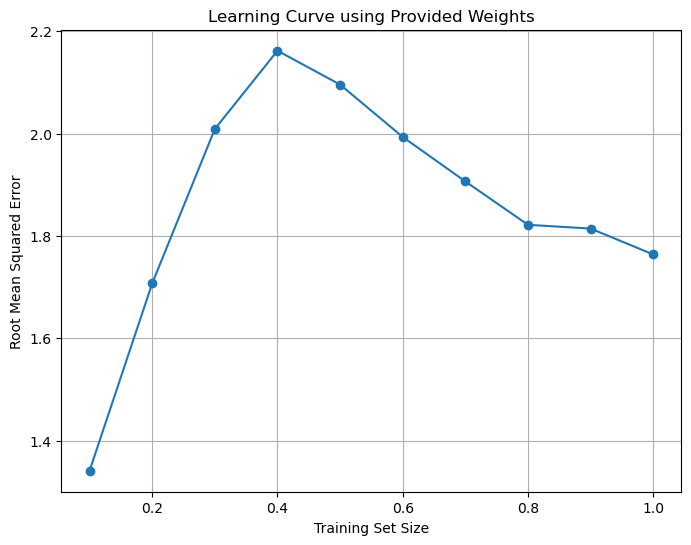

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on the weights

num_samples = len(X_train_scaled)
num_features = len(weights)  # Exclude bias term

X = X_train_scaled
bias = np.ones((num_samples, 1))
X_bias = np.hstack((bias, X))
y_true = y_train
print(len(X_train_scaled))
print(len(X_bias))


# Split data into train and test sets
train_size_range = np.linspace(0.1, 1.0, 10)
train_errors = []

for train_size in train_size_range:
    subset_size = int(train_size * num_samples)
    X_subset = X_bias[:subset_size]
    y_subset = y_true[:subset_size]

    # Calculate predictions using the provided weights
    y_pred = np.dot(X_subset, weights)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_subset - y_pred) ** 2))
    train_errors.append(rmse)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_size_range, train_errors, marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("Learning Curve using Provided Weights")
plt.grid()
plt.show()


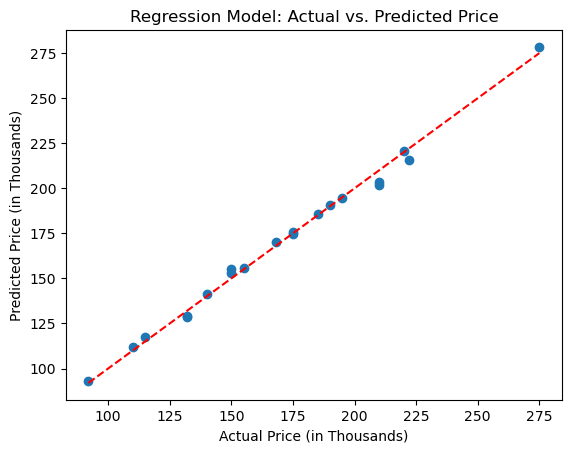

Accuracy for Price_in_Thousands: 98.47%

Mutual Information Importance:
                   Feature  Importance
10       Power Perf Factor    2.225528
3              Engine Size    0.725552
2       Price in Thousands    0.666541
7              Curb Weight    0.551632
9          Fuel Efficiency    0.536296
6                   Length    0.422138
8            Fuel Capacity    0.413363
5                    Width    0.409300
4                Wheelbase    0.352926
1        Year Resale Value    0.242520
12  Vehicle Type Passenger    0.030814
11        Vehicle Type Car    0.021743
0       Sales in Thousands    0.000000


Text(0.5, 1.0, 'learning curve')

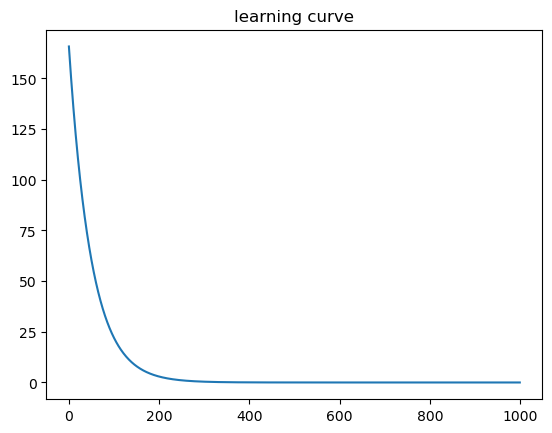

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

# Load your dataset (replace "your_dataset.csv" with the actual file name)
df = pd.read_csv("cars.csv")

# Select relevant features (excluding "Price_in_Thousands") and target variable
X = df.drop(columns=["Horsepower"]).values
y = df["Horsepower"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize weights and learning rate
weights = np.zeros(X_train_scaled.shape[1] + 1)
learning_rate = 0.01
num_iterations = 1000
err = []
# Add bias term (intercept)
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

# Gradient Descent
for _ in range(num_iterations):
    # Compute predictions
    predictions = np.dot(X_train_bias, weights)
    
    # Compute errors
    errors = y_train - predictions
    err.append(np.mean(errors))
    # Update weights
    gradient = -2 * np.dot(X_train_bias.T, errors) / len(y_train)
    weights -= learning_rate * gradient

# Predict on test set
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_pred = np.dot(X_test_bias, weights)

# Visual comparison between predicted and actual values for "Price_in_Thousands"
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price (in Thousands)")
plt.ylabel("Predicted Price (in Thousands)")
plt.title("Regression Model: Actual vs. Predicted Price")
plt.show()

# Calculate accuracy (you can use any appropriate metric)
accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

# Assess feature importance using mutual information
mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["Horsepower"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

# Display the results
print("\nMutual Information Importance:")
print(mi_df_sorted)

plt.plot(err)
plt.title('learning curve')

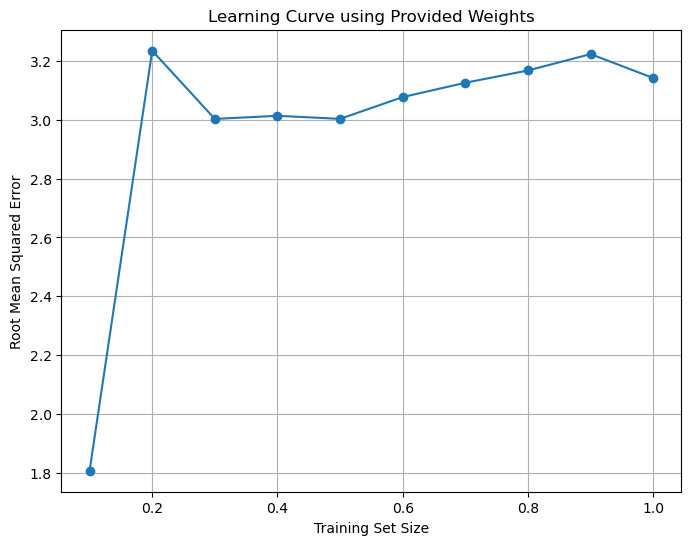

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on the weights

num_samples = len(X_train_scaled)
num_features = len(weights)  # Exclude bias term

X = X_train_scaled
bias = np.ones((num_samples, 1))
X_bias = np.hstack((bias, X))
y_true = y_train


# Split data into train and test sets
train_size_range = np.linspace(0.1, 1.0, 10)
train_errors = []

for train_size in train_size_range:
    subset_size = int(train_size * num_samples)
    X_subset = X_bias[:subset_size]
    y_subset = y_true[:subset_size]

    # Calculate predictions using the provided weights
    y_pred = np.dot(X_subset, weights)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_subset - y_pred) ** 2))
    train_errors.append(rmse)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_size_range, train_errors, marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("Learning Curve using Provided Weights")
plt.grid()
plt.show()


In [24]:
X_train_scaled.shape

(80, 13)

Average Training RMSE: 1.79
Average Validation RMSE: 1.76


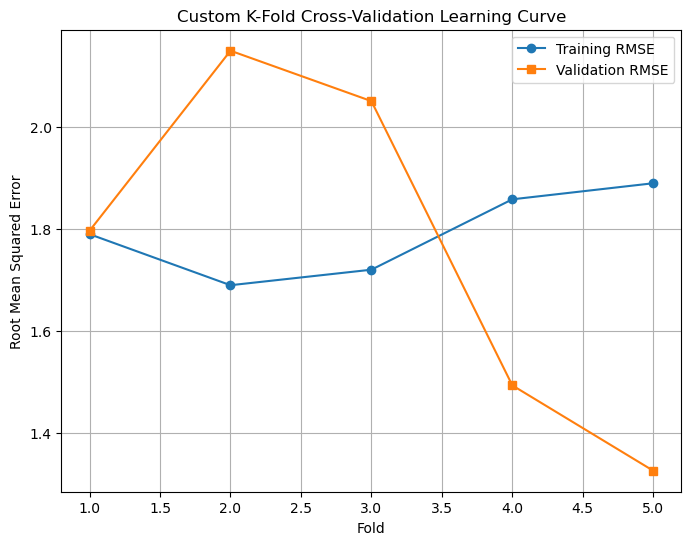

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace "your_dataset.csv" with the actual file name)
df = pd.read_csv("cars.csv")

# Select relevant features (excluding "Price_in_Thousands") and target variable
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize weights (you mentioned you have weights)
# Add bias term (intercept)
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Custom K-Fold Cross-Validation
k = 5  # Number of folds
subset_size = len(X_bias) // k

train_errors = []
test_errors = []

for fold in range(k):
    # Split data into train and test sets
    test_start = fold * subset_size
    test_end = (fold + 1) * subset_size
    X_train = np.vstack((X_bias[:test_start], X_bias[test_end:]))
    y_train = np.concatenate((y[:test_start], y[test_end:]))
    X_test = X_bias[test_start:test_end]
    y_test = y[test_start:test_end]

    # Gradient Descent
    # Update weights using gradient descent on the training data

    # Predict on train and test sets
    y_train_pred = np.dot(X_train, weights)
    y_test_pred = np.dot(X_test, weights)

    # Calculate RMSE for train and test sets
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Calculate average RMSE across all folds
avg_train_rmse = np.mean(train_errors)
avg_test_rmse = np.mean(test_errors)

print(f"Average Training RMSE: {avg_train_rmse:.2f}")
print(f"Average Validation RMSE: {avg_test_rmse:.2f}")

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, k + 1), train_errors, label="Training RMSE", marker="o")
plt.plot(range(1, k + 1), test_errors, label="Validation RMSE", marker="s")
plt.xlabel("Fold")
plt.ylabel("Root Mean Squared Error")
plt.title("Custom K-Fold Cross-Validation Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [27]:
subset_size

20

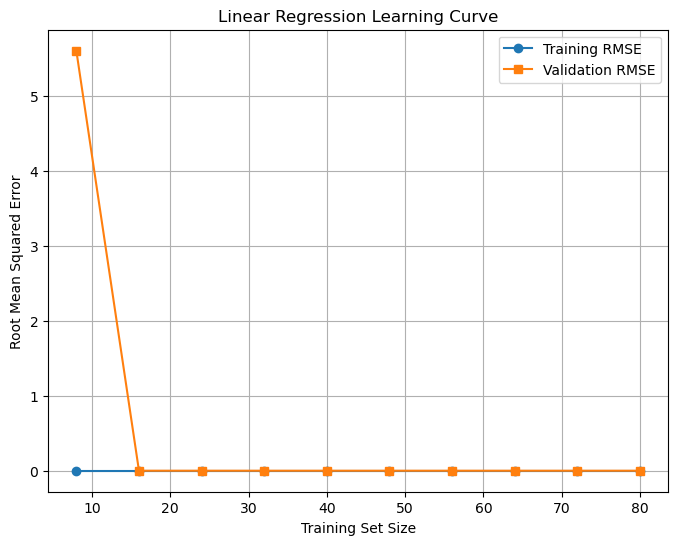

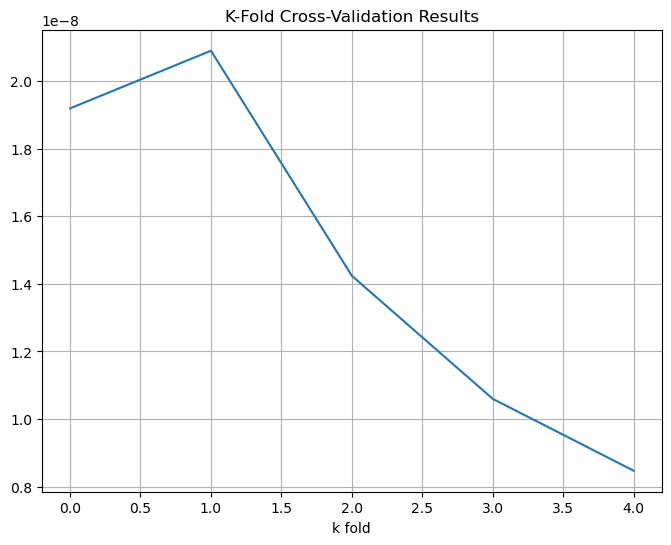

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace "your_dataset.csv" with the actual file name)
df = pd.read_csv("cars.csv")

# Select relevant features (excluding the target variable) and target variable
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10))

# Convert negative mean squared error to root mean squared error
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse, label="Training RMSE", marker="o")
plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("Linear Regression Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Perform K-Fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores)

# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(cv_rmse)
plt.xlabel("k fold")
plt.title("K-Fold Cross-Validation Results")
plt.grid()
plt.show()


In [29]:
train_rmse

array([2.30036496e-14, 4.63870261e-09, 1.22511847e-08, 1.20286120e-08,
       1.24731822e-08, 1.22514355e-08, 1.28364303e-08, 1.24713319e-08,
       1.21751193e-08, 1.18648698e-08])

In [32]:
cv_rmse

array([1.91902582e-08, 2.08967765e-08, 1.42381118e-08, 1.05965085e-08,
       8.47016652e-09])

In [34]:
X_scaled

array([[-0.6358796 ,  0.49510936, -1.20558656, ..., -0.54995253,
        -0.62360956,  0.62360956],
       [-0.34829748,  1.26803057,  0.37477035, ...,  1.34429809,
        -0.62360956,  0.62360956],
       [-0.59135654,  1.7913741 , -1.20558656, ..., -0.29249678,
        -0.62360956,  0.62360956],
       ...,
       [-0.19829136,  0.57537003, -1.20558656, ..., -0.35410643,
        -0.62360956,  0.62360956],
       [-0.72996946,  0.54238619, -0.97982128, ..., -1.08649082,
        -0.62360956,  0.62360956],
       [-0.78082918, -0.07661046, -0.97982128, ..., -1.14147578,
        -0.62360956,  0.62360956]])